# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [ ]:

!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 23.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=0833813ec16c76e9c92bee1308632bb0dfcedcd8a7c6595e52f53083df29de62
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dự liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

## Hãy xem dữ liệu tổng quan:

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [6]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:
for i in dates:
    total_cases.append(confirmed[i].sum())
    total_deaths.append(deaths[i].sum())
    total_recovered.append(recoveries[i].sum())
    total_active.append(confirmed[i].sum() - deaths[i].sum() - recoveries[i].sum())
    mortality_rate.append(deaths[i] / confirmed[i])
    recovery_rate.append(recoveries[i] / confirmed[i])


In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

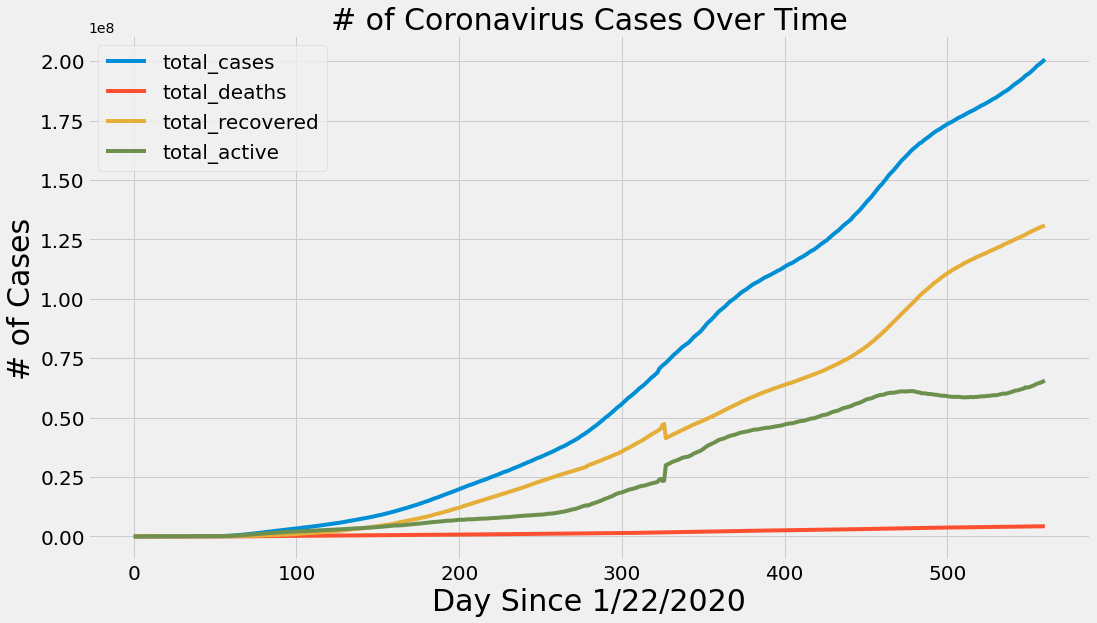

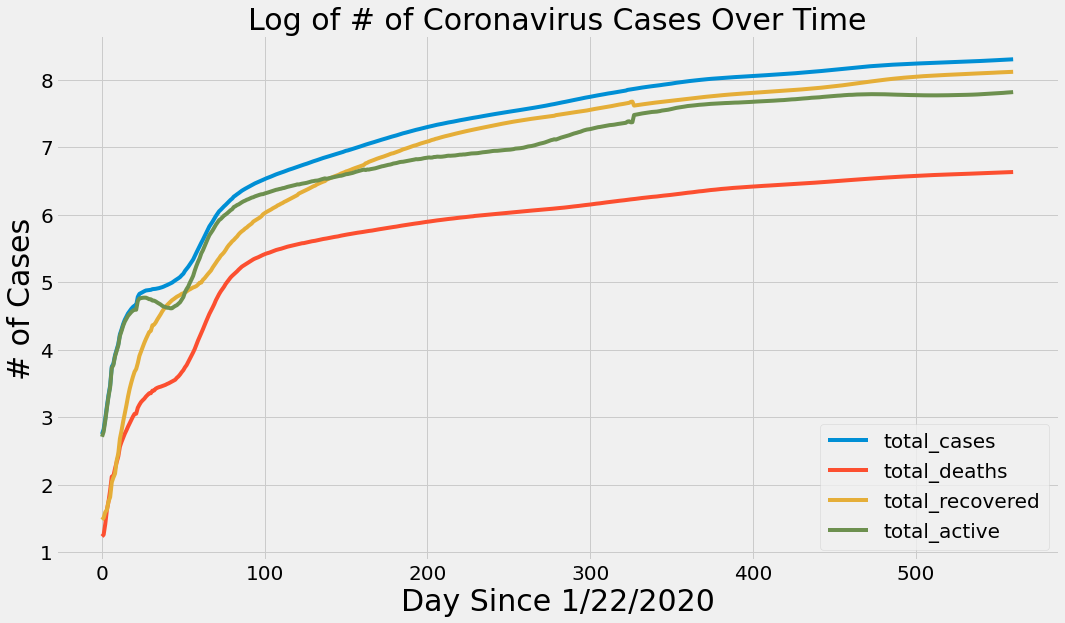

In [9]:
#Nhập mã lập trình của bạn tại đây:
# Graph 1
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(adjusted_dates, total_cases)
ax.plot(adjusted_dates, total_deaths)
ax.plot(adjusted_dates, total_recovered)
ax.plot(adjusted_dates, total_active)

ax.set_title('# of Coronavirus Cases Over Time', fontsize=30)
ax.set_xlabel('Day Since 1/22/2020', fontsize=30)
ax.set_ylabel('# of Cases', fontsize=30)
ax.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()


# Graph 2
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(adjusted_dates, np.log10(total_cases))
ax.plot(adjusted_dates, np.log10(total_deaths))
ax.plot(adjusted_dates, np.log10(total_recovered))
ax.plot(adjusted_dates, np.log10(total_active))

ax.set_title('Log of # of Coronavirus Cases Over Time', fontsize=30)
ax.set_xlabel('Day Since 1/22/2020', fontsize=30)
ax.set_ylabel('# of Cases', fontsize=30)
ax.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()


## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

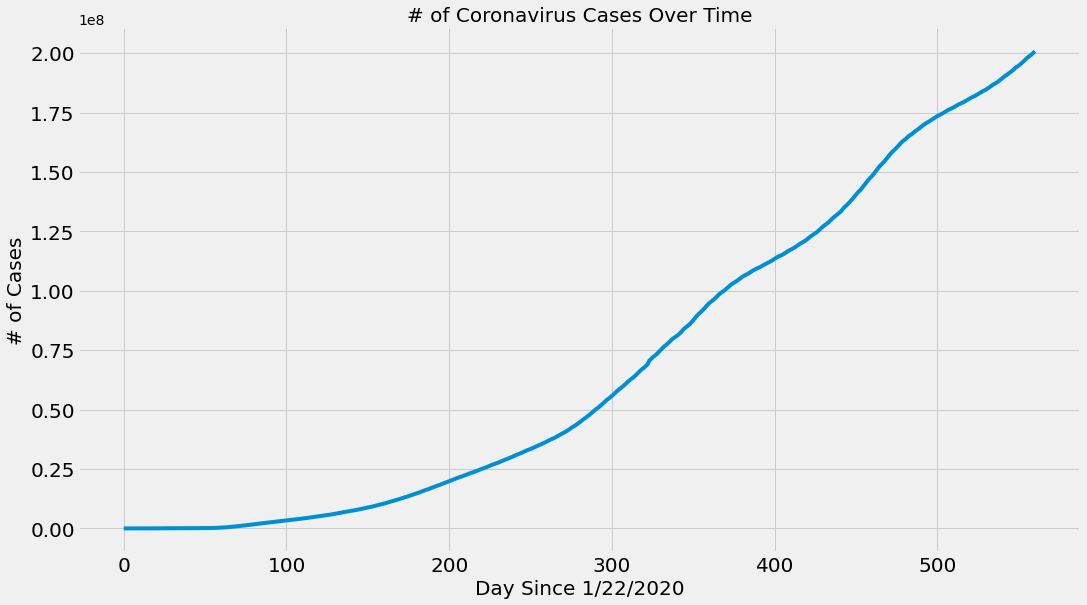

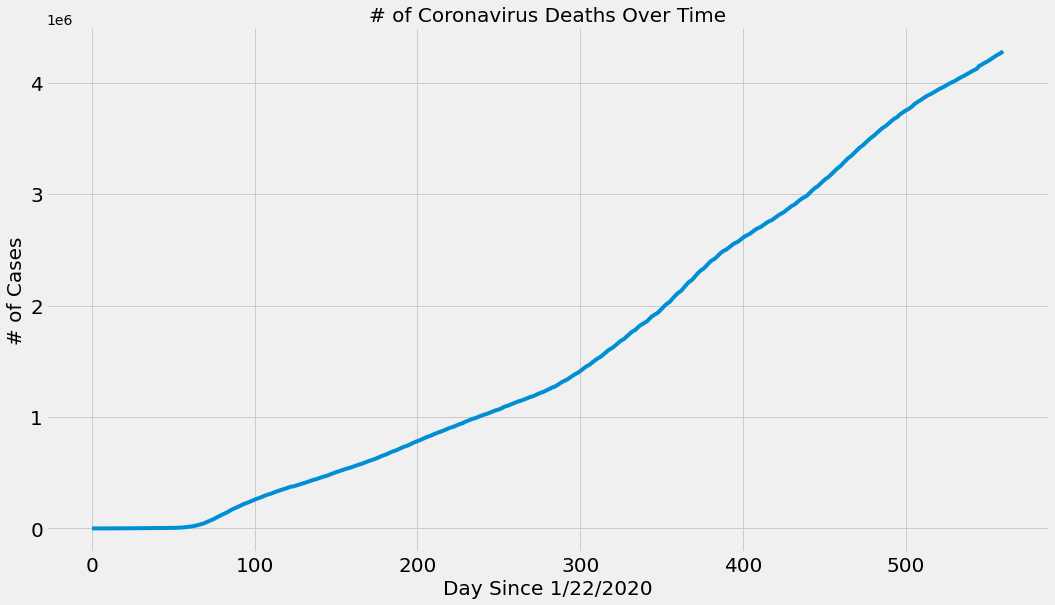

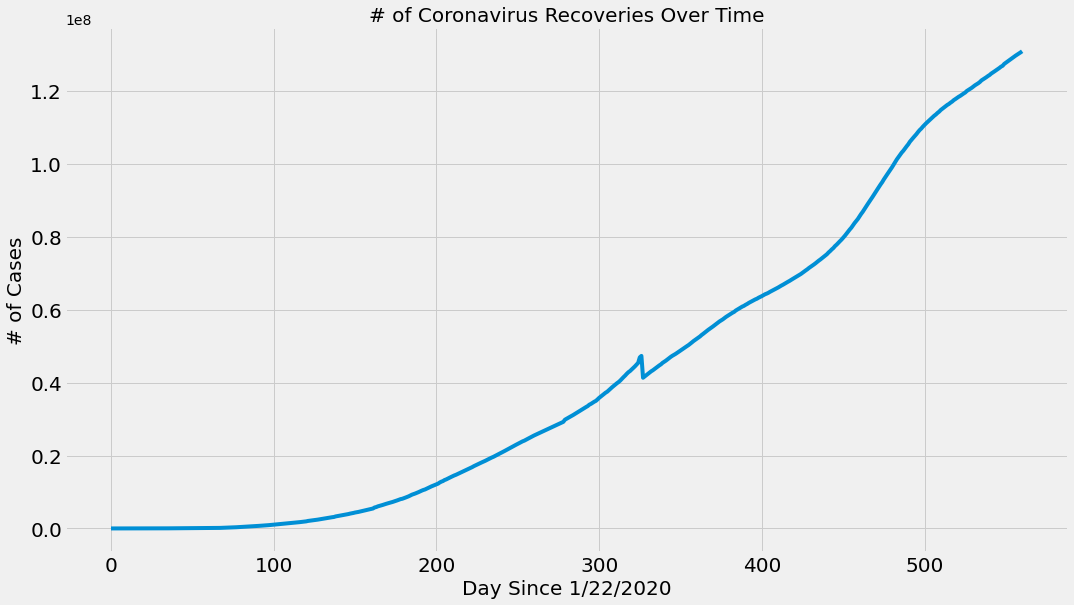

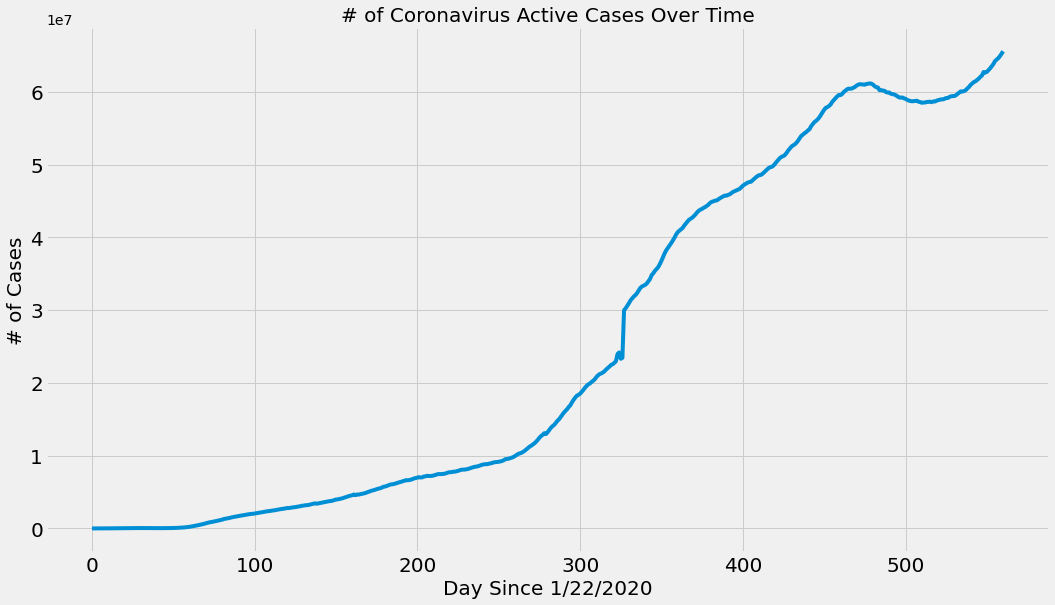

In [15]:
#Nhập mã lập trình của bạn tại đây:
list_total_data = [total_cases, total_deaths, total_recovered, total_active]
list_total_title = ['Cases', 'Deaths', 'Recoveries', 'Active Cases']

for list_total, title in zip(list_total_data, list_total_title):
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.plot(adjusted_dates, list_total)

    ax.set_title('# of Coronavirus {} Over Time'.format(title), fontsize=20)
    ax.set_xlabel('Day Since 1/22/2020', fontsize=20)
    ax.set_ylabel('# of Cases', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [11]:
#Nhập mã lập trình của bạn tại đây:
total_confirmed_df = confirmed.sum(axis=0).to_frame() 
total_confirmed_df.rename(columns={0: 'confirmed'}, inplace=True)
total_df = total_confirmed_df

total_deaths_df = deaths.sum(axis=0).to_frame()
total_df['deaths'] = total_deaths_df[0]

total_recoveries_df = recoveries.sum(axis=0).to_frame()
total_df['recoveries'] = total_recoveries_df[0]

total_df['active'] = total_df['confirmed'] - total_df['deaths'] - total_df['recoveries']
total_df

,confirmed,deaths,recoveries,active
1/22/20,557,17,30,510
1/23/20,657,18,32,607
1/24/20,944,26,39,879
1/25/20,1437,42,42,1353
1/26/20,2120,56,56,2008
...,...,...,...,...
7/31/21,198389684,4246601,129705211,64437872
8/1/21,198872752,4254020,129994389,64624343
8/2/21,199443855,4262171,130277533,64904151
8/3/21,200078130,4272524,130582001,65223605


In [12]:
daily_increase_df = total_df.diff()
daily_increase_df[daily_increase_df < 0] = 0
daily_increase_df = daily_increase_df.fillna(0).astype(int)
daily_increase_df = daily_increase_df.reset_index()
daily_increase_df.rename(columns={'index': 'date', 'confirmed': 'in_confirmed', 'deaths': 'in_deaths', 'recoveries': 'in_recoveries', 'active': 'in_active'}, inplace=True)
daily_increase_df

,date,in_confirmed,in_deaths,in_recoveries,in_active
0,1/22/20,0,0,0,0
1,1/23/20,100,1,2,97
2,1/24/20,287,8,7,272
3,1/25/20,493,16,3,474
4,1/26/20,683,14,14,655
...,...,...,...,...,...
556,7/31/21,517345,8844,303929,204572
557,8/1/21,483068,7419,289178,186471
558,8/2/21,571103,8151,283144,279808
559,8/3/21,634275,10353,304468,319454


## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

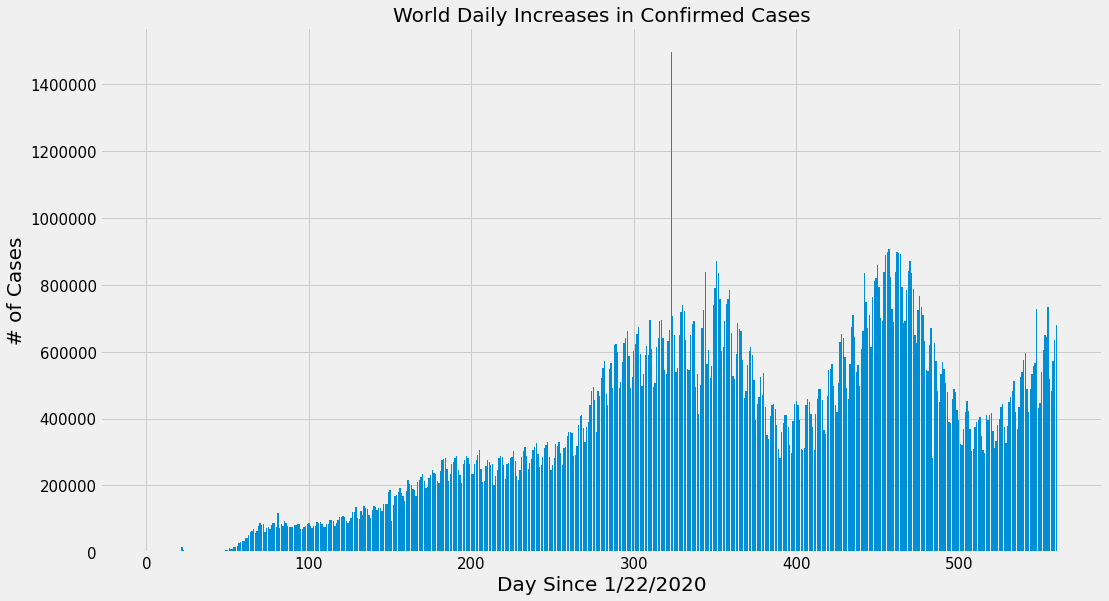

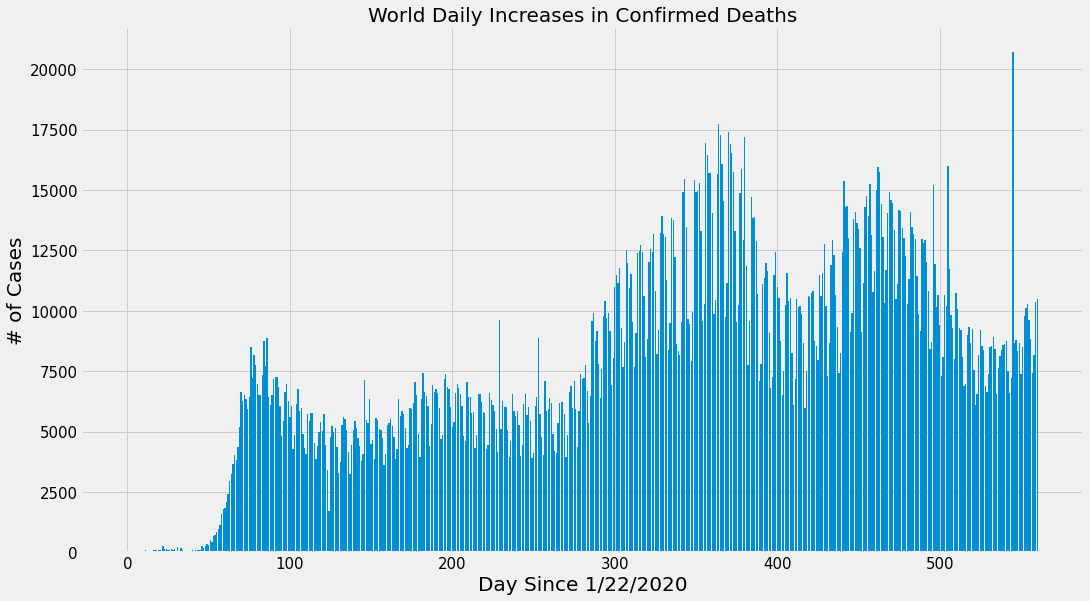

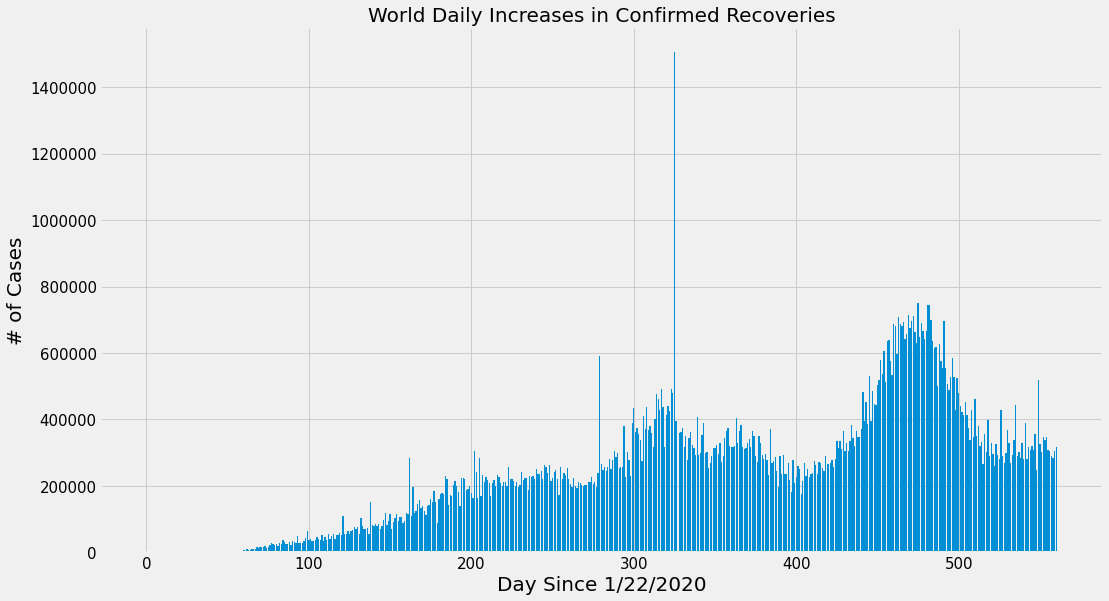

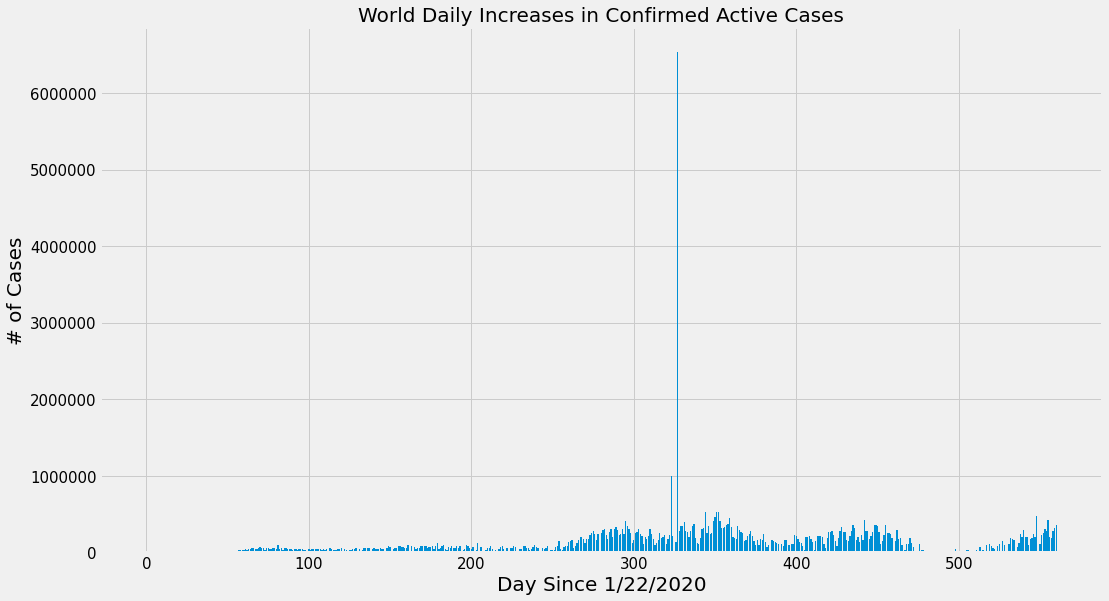

In [24]:
#Nhập mã lập trình của bạn tại đây:
#NDN: Chưa biết cách chia lại range trong x_label: hiện tại đang mặc định range=100 vs đáp án: range=25
list_increase_columns = daily_increase_df.drop('date', axis=1).columns.tolist()
list_increase_title = ['Cases', 'Deaths', 'Recoveries', 'Active Cases']

for column, title in zip(list_increase_columns, list_increase_title):
    fig, ax = plt.subplots(figsize=(16, 9))

    ax.bar(daily_increase_df.index, daily_increase_df[column])

    ax.set_title('World Daily Increases in Confirmed {}'.format(title), fontsize=20)
    ax.set_xlabel('Day Since 1/22/2020', fontsize=20)
    ax.set_ylabel('# of Cases', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')

    plt.show()


# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [25]:
#Nhập mã lập trình của bạn tại đây:
total_df = total_df.reset_index()
total_df


,index,confirmed,deaths,recoveries,active
0,1/22/20,557,17,30,510
1,1/23/20,657,18,32,607
2,1/24/20,944,26,39,879
3,1/25/20,1437,42,42,1353
4,1/26/20,2120,56,56,2008
...,...,...,...,...,...
556,7/31/21,198389684,4246601,129705211,64437872
557,8/1/21,198872752,4254020,129994389,64624343
558,8/2/21,199443855,4262171,130277533,64904151
559,8/3/21,200078130,4272524,130582001,65223605


In [26]:
#Nhập code ở đây: || Ta đã có total_df đã có ở bài toán 4
total_df.rename(columns={'index': 'date'}, inplace=True)
total_df['mortality_rate'] = total_df['deaths'] / total_df['confirmed'] * 100
total_df['recovery_rate'] = total_df['recoveries'] / total_df['confirmed'] * 100
total_df

,date,confirmed,deaths,recoveries,active,mortality_rate,recovery_rate
0,1/22/20,557,17,30,510,3.052065,5.385996
1,1/23/20,657,18,32,607,2.739726,4.870624
2,1/24/20,944,26,39,879,2.754237,4.131356
3,1/25/20,1437,42,42,1353,2.922756,2.922756
4,1/26/20,2120,56,56,2008,2.641509,2.641509
...,...,...,...,...,...,...,...
556,7/31/21,198389684,4246601,129705211,64437872,2.140535,65.379010
557,8/1/21,198872752,4254020,129994389,64624343,2.139066,65.365611
558,8/2/21,199443855,4262171,130277533,64904151,2.137028,65.320405
559,8/3/21,200078130,4272524,130582001,65223605,2.135428,65.265505


# Bài toán 7
**7.1** 

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

In [27]:
#Nhập mã lập trình của bạn tại đây:
#Bước 1: Tính toản mean và thêm vào DataFrame Total_df 
total_df['mortality_rate_mean']= total_df['mortality_rate'].mean()
total_df['recovery_rate_mean']= total_df['recovery_rate'].mean()
total_df

,date,confirmed,deaths,recoveries,active,mortality_rate,recovery_rate,mortality_rate_mean,recovery_rate_mean
0,1/22/20,557,17,30,510,3.052065,5.385996,3.438476,52.716408
1,1/23/20,657,18,32,607,2.739726,4.870624,3.438476,52.716408
2,1/24/20,944,26,39,879,2.754237,4.131356,3.438476,52.716408
3,1/25/20,1437,42,42,1353,2.922756,2.922756,3.438476,52.716408
4,1/26/20,2120,56,56,2008,2.641509,2.641509,3.438476,52.716408
...,...,...,...,...,...,...,...,...,...
556,7/31/21,198389684,4246601,129705211,64437872,2.140535,65.379010,3.438476,52.716408
557,8/1/21,198872752,4254020,129994389,64624343,2.139066,65.365611,3.438476,52.716408
558,8/2/21,199443855,4262171,130277533,64904151,2.137028,65.320405,3.438476,52.716408
559,8/3/21,200078130,4272524,130582001,65223605,2.135428,65.265505,3.438476,52.716408


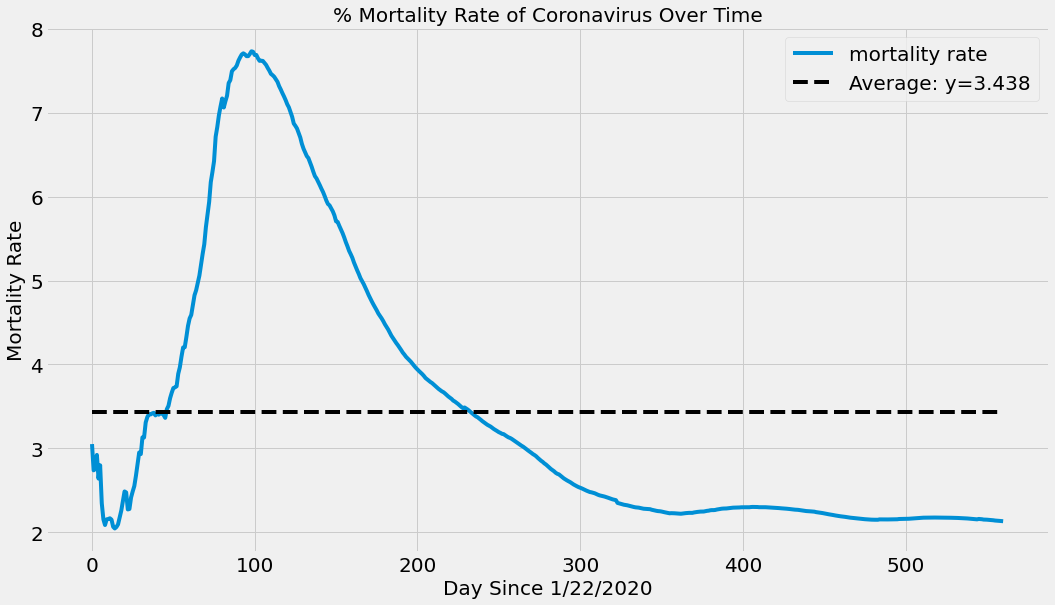

In [32]:
#Bước 2: Show chart 
fig, ax = plt.subplots(figsize=(16, 9))

total_df['mortality_rate'].plot(kind='line')
total_df['mortality_rate_mean'].plot(kind='line', linestyle='dashed', color='black')

ax.set_title('% Mortality Rate of Coronavirus Over Time', fontsize=20)
ax.set_xlabel('Day Since 1/22/2020', fontsize=20)
ax.set_ylabel('Mortality Rate', fontsize=20)
ax.legend(['mortality rate', 'Average: y=' + str(round(total_df['mortality_rate'].mean(), 3))], prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

**7.2** 

    Trực quan hóa tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

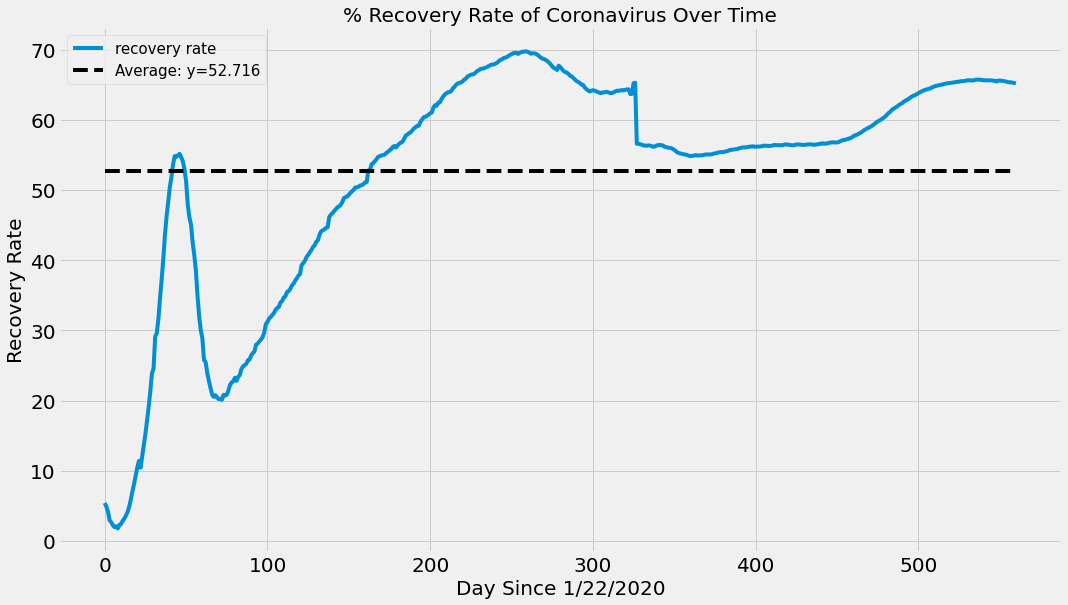

In [48]:
#Nhập mã lập trình của bạn tại đây:
fig, ax = plt.subplots(figsize=(16, 9))

total_df['recovery_rate'].plot(kind='line')
total_df['recovery_rate_mean'].plot(kind='line', linestyle='dashed', color='black')

ax.set_title('% Recovery Rate of Coronavirus Over Time', fontsize=20)
ax.set_xlabel('Day Since 1/22/2020', fontsize=20)
ax.set_ylabel('Recovery Rate', fontsize=20)
ax.legend(['recovery rate', 'Average: y=' + str(round(total_df['recovery_rate'].mean(),3))], prop={'size': 15}, loc="upper left")
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [49]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [50]:
#Nhập mã lập trình của bạn tại đây:
confirmed_df.insert(2, "continent", [continents[country_to_continent_code(country)] for country in countries])
deaths_df.insert(2, "continent", [continents[country_to_continent_code(country)] for country in countries1])
recoveries_df.insert(2, "continent", [continents[country_to_continent_code(country)] for country in countries2])
confirmed_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [330]:
#Nhập mã lập trình của bạn tại đây:
country_df = confirmed_df[['Country/Region','continent']].drop_duplicates().sort_values('Country/Region')
#country_df.reset_index()
country_df['Confirmed'] = list(confirmed_df.groupby('Country/Region')[confirmed_df.columns[-2]].sum())
country_df['Deaths'] = list(deaths_df.groupby('Country/Region')[deaths_df.columns[-2]].sum())
country_df['Recoveries'] = list(recoveries_df.groupby('Country/Region')[recoveries_df.columns[-2]].sum())
#country_df.fillna(0, inplace = True)
country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Mortality Rate'] = round(country_df['Deaths'] / country_df['Confirmed'] * 100,2)
country_df = country_df.set_index('Country/Region')
country_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148572,6804,82586,59182,4.58
Albania,Europe,133211,2457,130291,463,1.84
Algeria,Africa,175229,4370,117557,53302,2.49
Andorra,Europe,14766,128,14348,290,0.87
Angola,Africa,43070,1022,39389,2659,2.37
...,...,...,...,...,...,...
West Bank and Gaza,Others,317264,3609,312289,1366,1.14
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,7086,1380,4232,1474,19.48


# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [54]:
#Nhập mã lập trình của bạn tại đây:
continents_df = country_df.groupby('continent', axis = 0).sum()
continents_df['Active'] = continents_df['Confirmed'] - continents_df['Deaths'] - continents_df['Recoveries']
continents_df['Mortality Rate'] = round(continents_df['Deaths'] / continents_df['Confirmed'] * 100,2)

continents_df.head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6810421,172864,5916462,721095,2.54
Asia,62256172,898675,57669460,3688037,1.44
Australia,88510,1409,54055,33046,1.59
Europe,52311673,1165944,27912932,23232797,2.23
North America,42207215,923040,5748546,35535629,2.19


## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [55]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Bài toán 11
**11.1** 

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

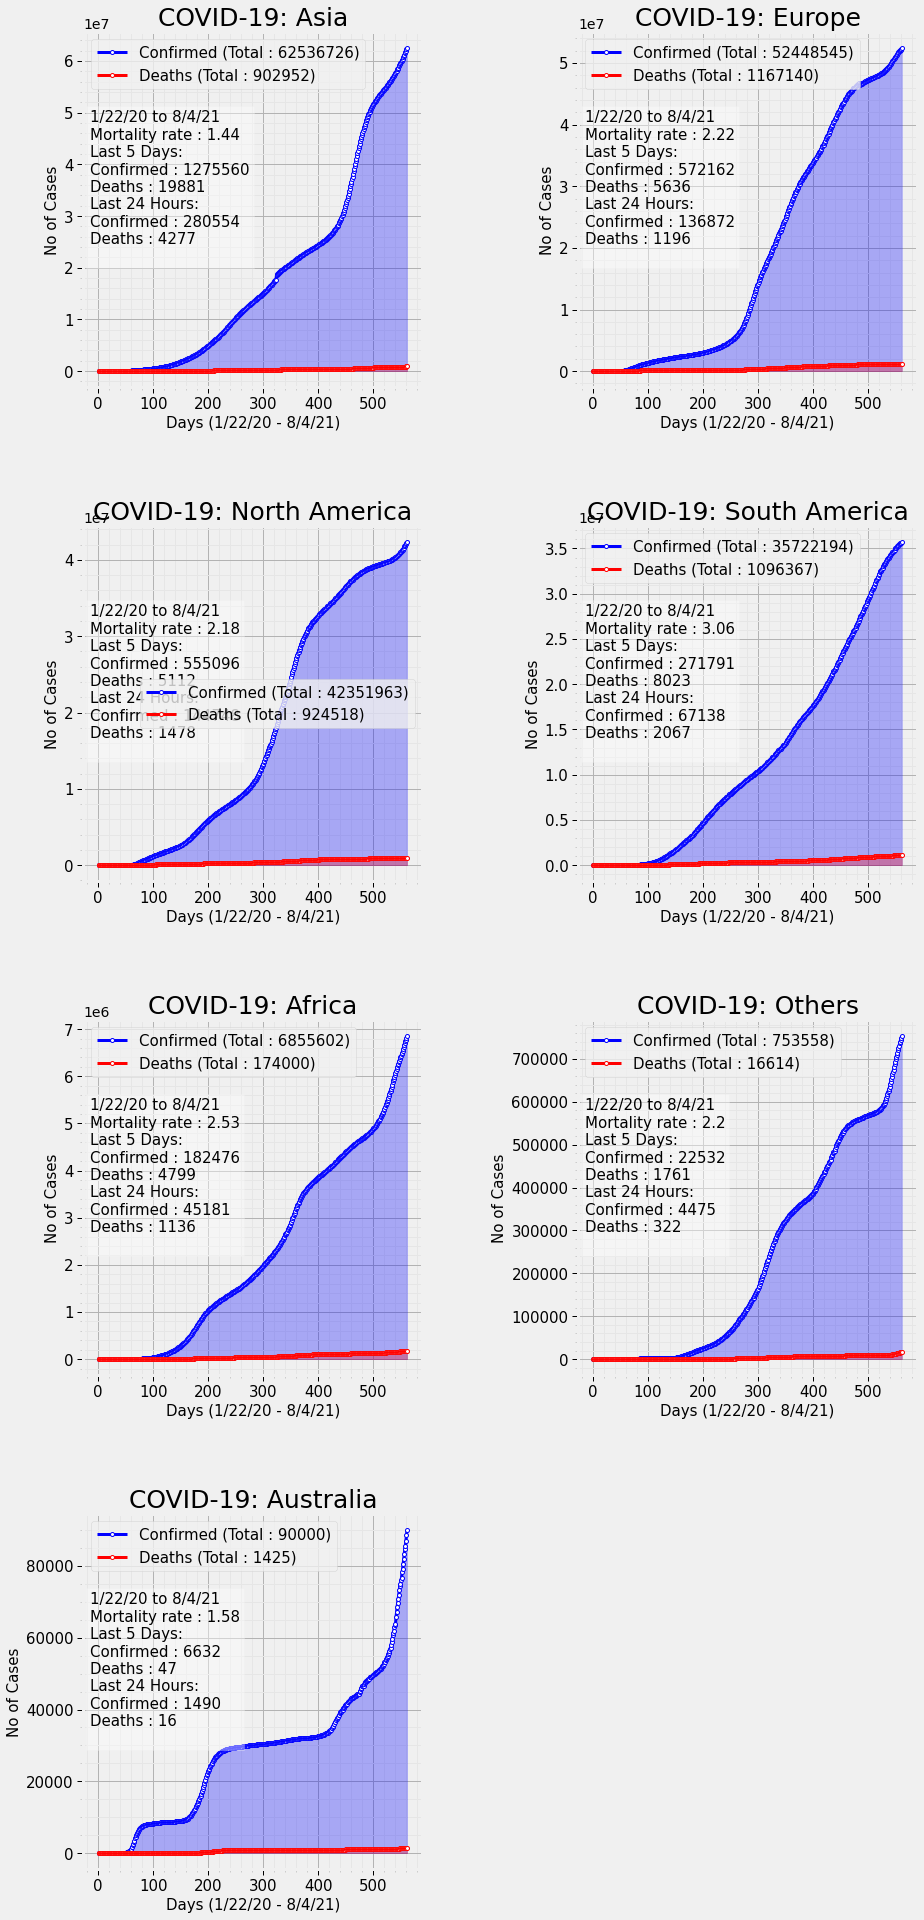

In [61]:
#Nhập mã lập trình của bạn tại đây:
list_continents = continents_df.sort_values(by='Confirmed', ascending=False).index

fig = plt.figure(figsize=(16, 30))
for i, item in enumerate(list_continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent=item, figure=(fig, 4, 2, i+1))
plt.show()


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để: 
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [65]:
def plot_params(ax, axis_label=None, plt_title=None, label_size=15, axis_fsize=15, title_fsize=20, scale='linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw=1, ls='-', c="0.7", which='major')
    plt.grid(lw=1, ls='-', c="0.9", which='minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None, country=None, state=None, period=None, figure=None,
                          scale="linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):    
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

Note: Từ function gốc, ta sử lại function khác như trên: Thêm vào if_else phần  "Total_recoveries" và điều chỉnh-thêm vào hạng mục text: và tính toán 7 ngày chính là 
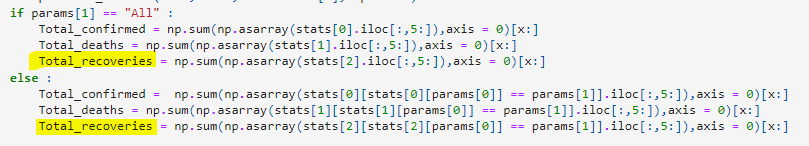
 
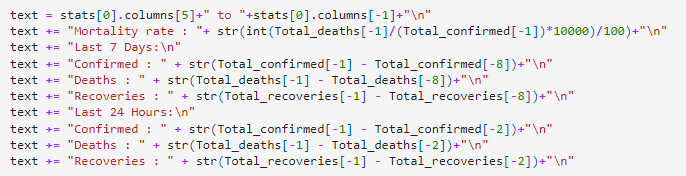

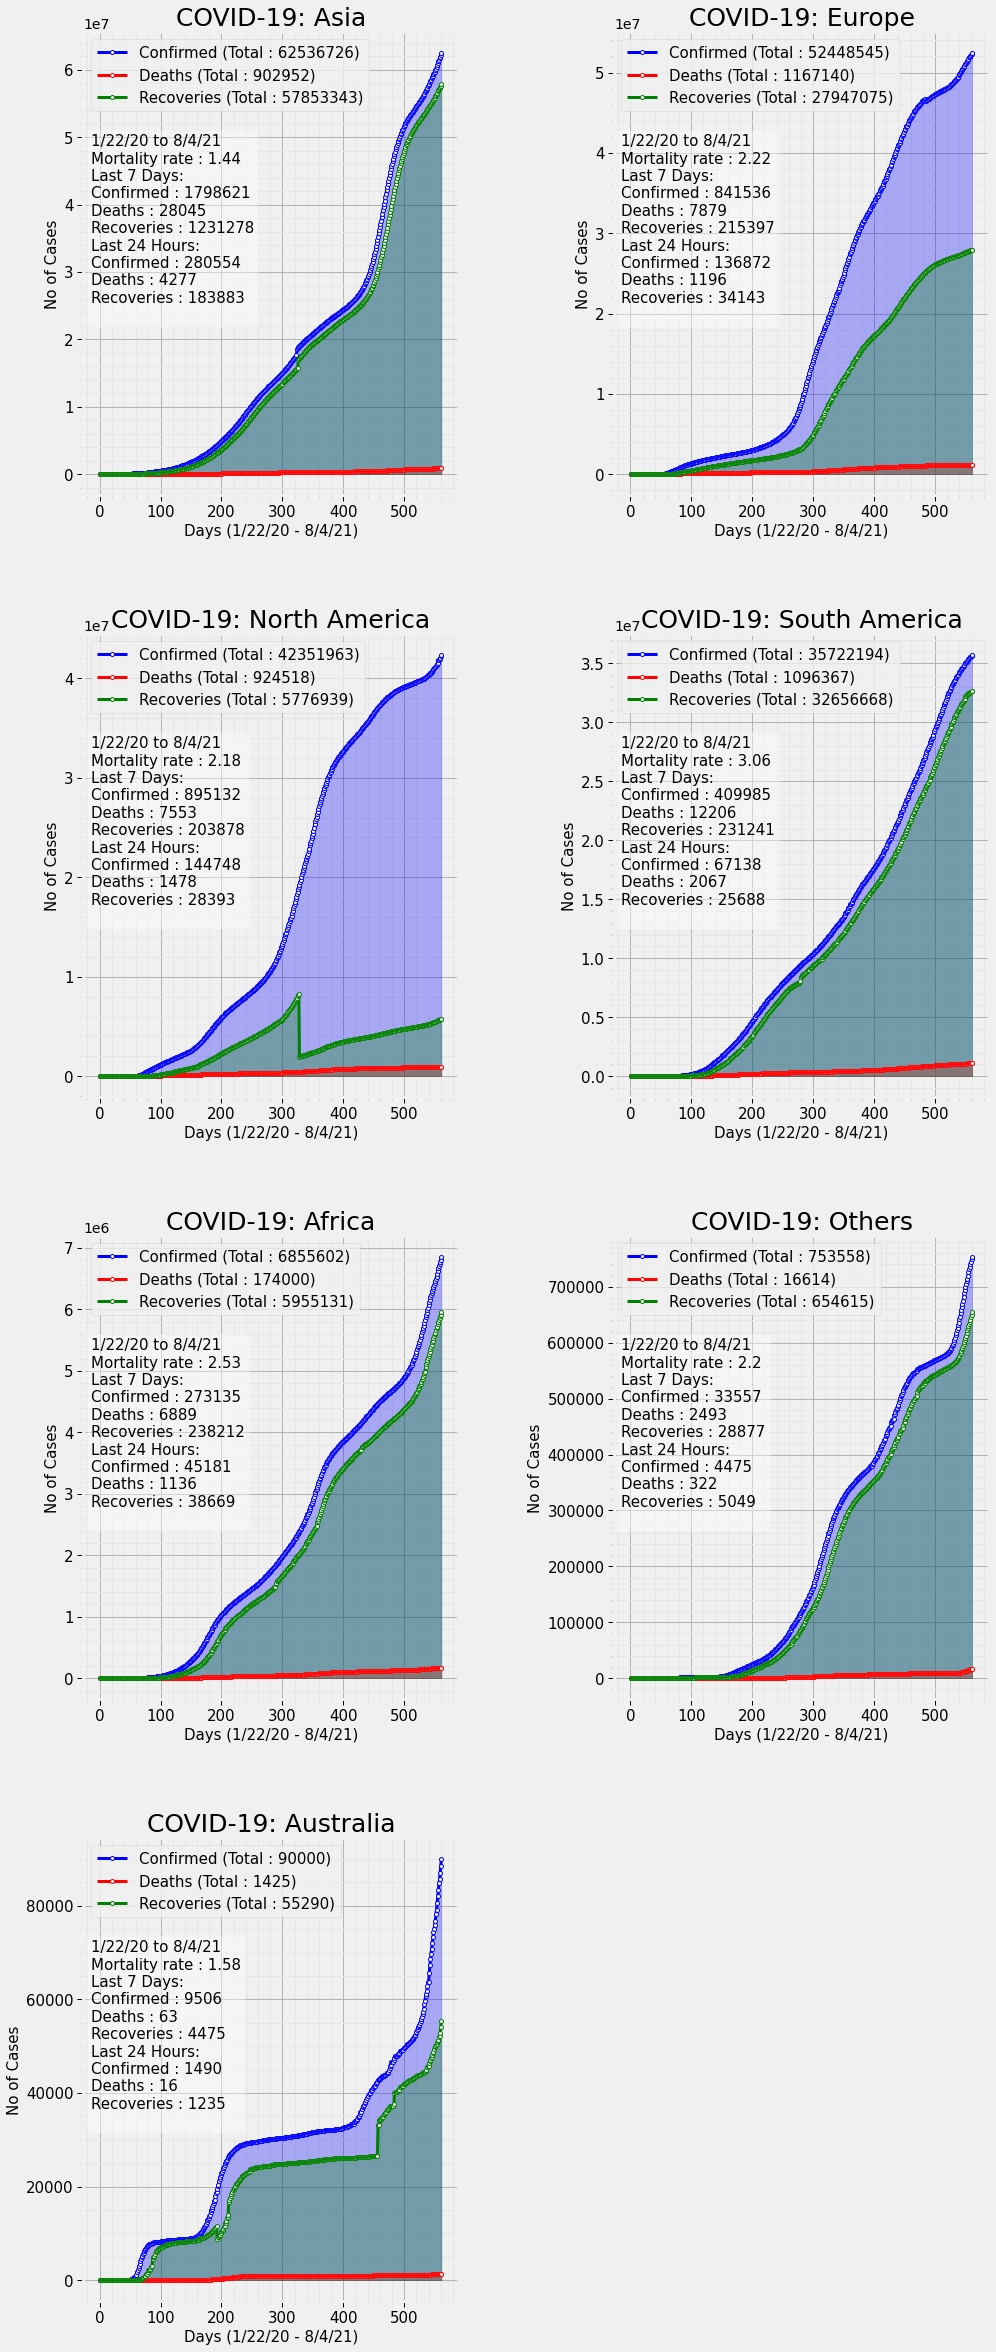

In [67]:
#Nhập mã lập trình của bạn tại đây:
fig = plt.figure(figsize=(17, 36))
for i, item in enumerate(list_continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=item, figure=(fig, 4, 2, i+1))
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 30))
for i, item in enumerate(list_continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent=item, figure=(fig, 4, 2, i+1))
plt.show()

# Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

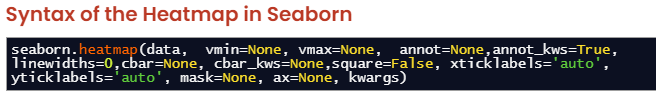

Note: Các tham số được sử dụng: Tham khảo tại link https://linuxhint.com/seaborn-heatmap-size/
   * sns.set(rc={'figure.figsize': (10, 7)}): Set size của Heatmap
   * annot = True: Show data lên biểu đồ Heatmap
   * annot_kws: Hiện thị giá trị và độ lớn  trên Heatmap
   * linewidths: Hiển thị khoảng cách cách cell
   * cbar = True: Show colorbar scale

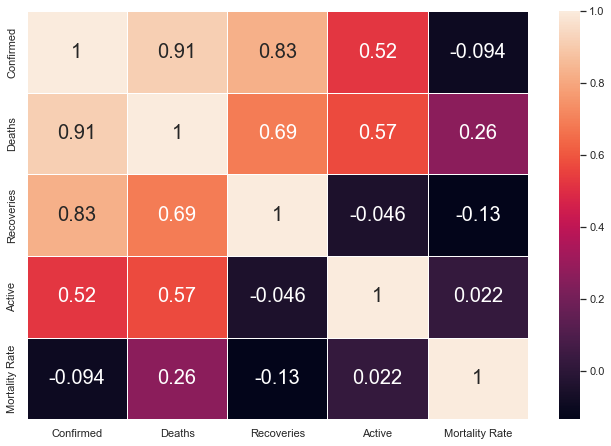

In [111]:
#Nhập mã lập trình của bạn tại đây:
sns.set(rc={'figure.figsize': (10, 7)})
sns.heatmap(continents_df.corr(), annot = True, annot_kws={'size':20}, linewidths = 1, cbar=True)

plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

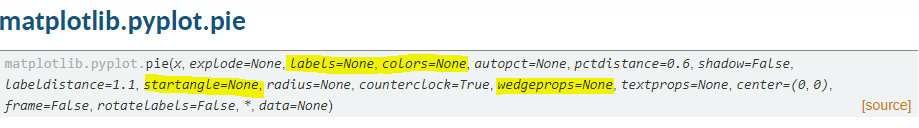 
Note: Tham khảo tại 
* Nguồn sources documetation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
* Matplotlib Pie Charts - How to Plot and Customize: https://www.youtube.com/watch?v=cJte-7cikzc
* How to Create a Pie Chart in Python Matplotlib? https://www.youtube.com/watch?v=PSji21jUNO0
* Color Palette: https://colorhunt.co/palette/f99b7de76161b047598bacaa
* =======
* explode: dùng để vẽ chart pie tách ra - mặc định  explode = (0,0,0...,0) ==> Muốn custom thì (0,0.1,0.2,..,0)
* autopct='%1.1f%%': thể hiện giá trị % lên biểu đồ, dạng float cí 1 chữ số thập phân
* labels=None: Ta không muốn thể hiện lables của từng piece of pie - đây là mặc định
* startangle=90 : float, optional, default: None || If not None, rotates the start of the pie chart by angle degrees counterclockwise from the x-axis. ==> Quay ngược chiều kim đồng hồ 90 độ
* radius của pie: mặc định bằng 1 
* textprops: Kích thức text trong pie

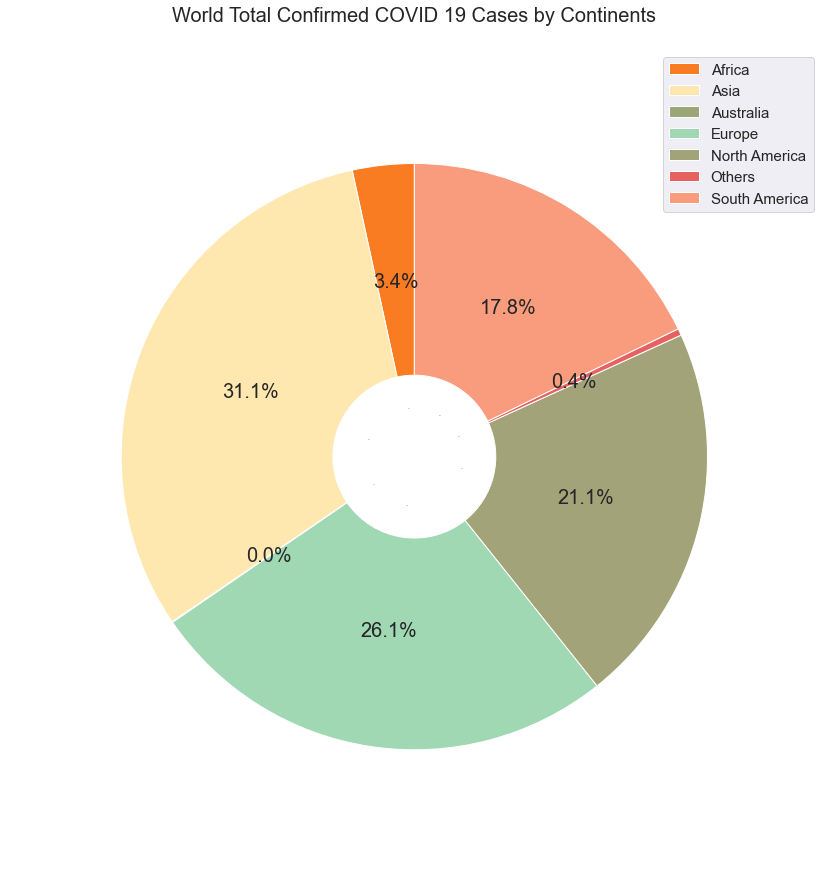

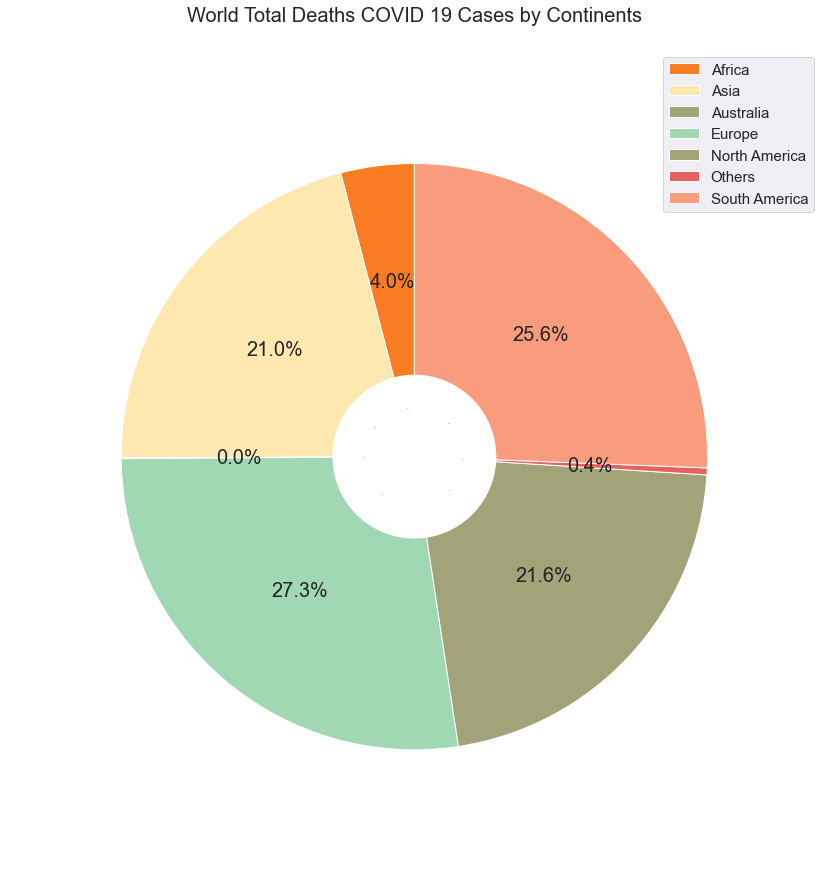

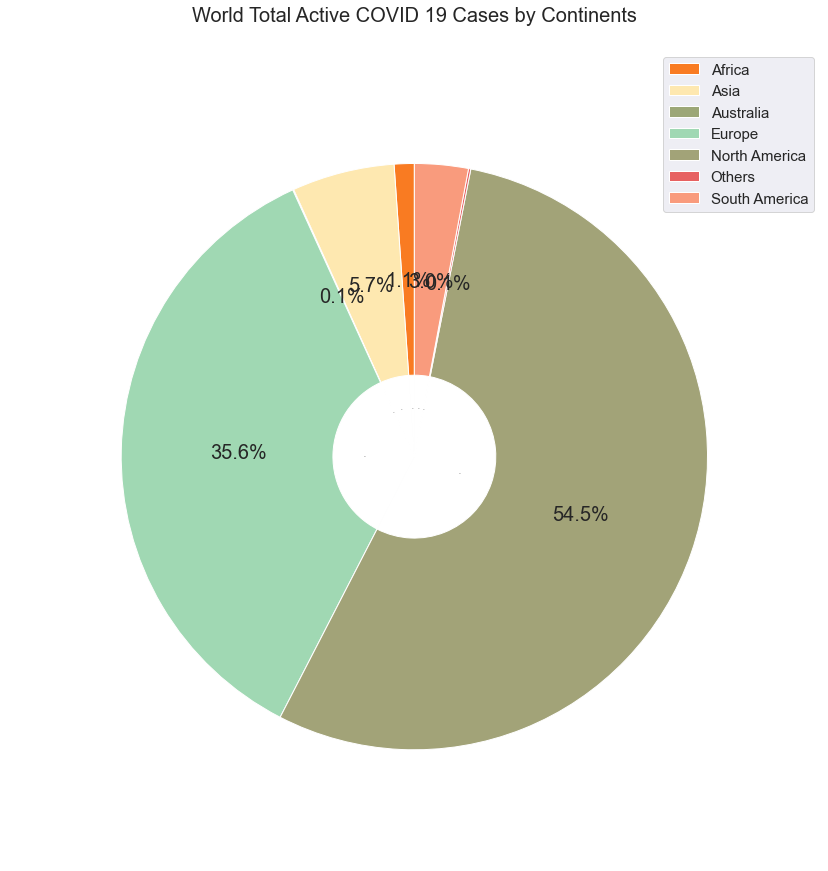

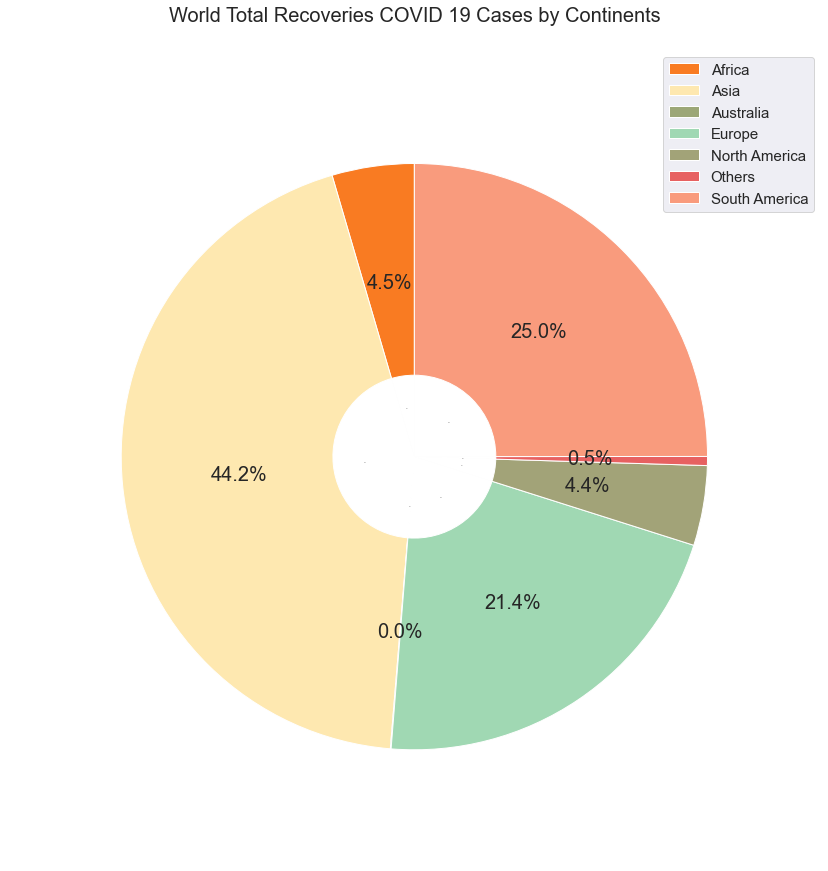

In [224]:
#Nhập mã lập trình của bạn tại đây:
columns = ['Confirmed', 'Deaths', 'Active', 'Recoveries']
for column in columns:
    fig, ax = plt.subplots(figsize=(13, 15))
    
    continents_df[column].plot(
        kind='pie',
        autopct='%1.1f%%', 
        labels=None,
        radius=0.9,
        textprops = {'fontsize':20},
        #colors = ['red', 'blue', 'green','yellow', 'orange', 'gray', 'pink'],
        colors = ['#F97B22', '#FEE8B0', '#9CA777','#A0D8B3', '#A2A378', '#E76161', '#F99B7D'],
        startangle=90,       
    )
    #Vẽ thêm 1 chartt pie màu trắng ở giữa 
    continents_df[column].plot(
        kind='pie',
        autopct='%1.1f%%', 
        labels=None,
        radius=0.25,
        textprops = {'fontsize':0},
        colors = "w",
        startangle=90,       
    )
    
    ax.set_title('World Total ' + column + ' COVID 19 Cases by Continents\n', fontsize=20)
    ax.set_ylabel(None)
    ax.legend(continents_df.index, loc='upper right', prop={'size': 15})

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [236]:
#Bước 1: từ country_df đã có bài toán 9 ta thêm 2 cột Lat và Long dùng để vẽ trên Map Folium
country_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148572,6804,82586,59182,4.58
Albania,Europe,133211,2457,130291,463,1.84
Algeria,Africa,175229,4370,117557,53302,2.49
Andorra,Europe,14766,128,14348,290,0.87
Angola,Africa,43070,1022,39389,2659,2.37
...,...,...,...,...,...,...
West Bank and Gaza,Others,317264,3609,312289,1366,1.14
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,7086,1380,4232,1474,19.48


In [238]:
#Bước 2: Ta thêm 2 cột Lat và Long vào Df country_df.copy() và tạo DF mơi country_df_new
country_df_new = country_df.copy()
country_df_new['Lat'] = confirmed_df.groupby('Country/Region')['Lat'].max().tolist()
country_df_new['Long'] = confirmed_df.groupby('Country/Region')['Long'].max().tolist()

country_df_new

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
Afghanistan,Asia,148572,6804,82586,59182,4.58,33.939110,67.709953
Albania,Europe,133211,2457,130291,463,1.84,41.153300,20.168300
Algeria,Africa,175229,4370,117557,53302,2.49,28.033900,1.659600
Andorra,Europe,14766,128,14348,290,0.87,42.506300,1.521800
Angola,Africa,43070,1022,39389,2659,2.37,-11.202700,17.873900
...,...,...,...,...,...,...,...,...
West Bank and Gaza,Others,317264,3609,312289,1366,1.14,31.952200,35.233200
Winter Olympics 2022,Others,0,0,0,0,NaN,39.904200,116.407400
Yemen,Asia,7086,1380,4232,1474,19.48,15.552727,48.516388


In [253]:
#Bước 3: Vẽ map nhờ Folium
import folium
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

covid_map = folium.Map()  #Tổng quan Map thế giới
covid_map


In [369]:
#Bước 4: Vẽ map và Maker
covid_map = folium.Map()
point = folium.map.FeatureGroup()

for lat, long, country, confirmed, deaths, recovered, moritality_rate \
in zip(
    country_df_new['Lat'], country_df_new['Long'], 
    country_df_new.index, country_df_new['Confirmed'], 
    country_df_new['Deaths'], country_df_new['Recoveries'], 
    country_df_new['Mortality Rate']
):
    #Thiết kết Lable cho Popup - Sử dụng inline CSS
    label = ('<center><b><p style="font-size:25px">{}</p></b></center><hr>' 
             + '<li style="font-size:15px">  Confirmed: {}  </li>' 
             + '<li style="font-size:15px">Deaths: {}</li>' 
             + '<li style="font-size:15px">Recovered: {}</li>' 
             + '<li style="font-size:15px" >Mortality Rate: {}</li>').format(country, confirmed, deaths, 
                                                                             recovered, moritality_rate)

    point.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=confirmed/country_df_new['Confirmed'].sum()*300,
            color='#1f77b4',
            fill=True,
            fill_color='#1f77b4',
            #Show popup detail lên map
            popup=folium.Popup(label, max_width=300),
            fill_opacity=0.3  
        )
    ).add_to(covid_map)

covid_map

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [304]:
#Bước 1: Tạo df mới để tiến hành xử lý 
temp_df = pd.DataFrame(country_df['Active'])
temp_df = temp_df.reset_index()

,Country/Region,Active
0,Afghanistan,59182
1,Albania,463
2,Algeria,53302
3,Andorra,290
4,Angola,2659
...,...,...
196,West Bank and Gaza,1366
197,Winter Olympics 2022,0
198,Yemen,1474
199,Zambia,4360


Note: Vẽ chart choropleth ta Note tham khảo tại nguồn: https://plotly.com/python/choropleth-maps/
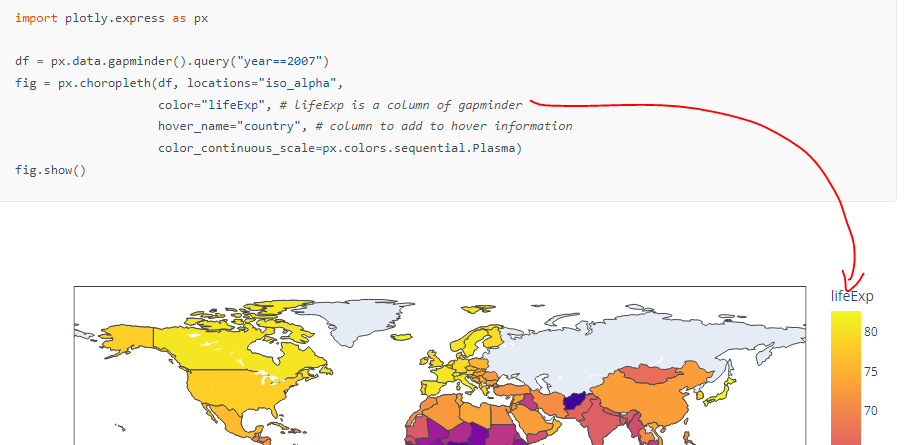


In [306]:
#Bước 2: Vẽ chart choropeth 
fig = px.choropleth(temp_df, locations="Country/Region",
                    color=np.log10(temp_df["Active"]), # lifeExp is a column of gapminder
                    hover_name="Country/Region", # column to add to hover information
                    hover_data=["Active"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)",colorscale="spectral")
fig.show()


C:\Users\This PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

C:\Users\This PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [308]:
#Nhập mã lập trình của bạn tại đây:
country_df_cp = country_df_new.copy()
df_top10 = country_df_cp.sort_values('Confirmed', ascending = False).head(10)
df_top10

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
Country/Region,,,,,,,,
USA,North America,35358371,610673,0,34747698,1.73,40.000000,-100.000000
India,Asia,31769132,425757,30933022,410353,1.34,20.593684,78.962880
Brazil,South America,19993870,558872,17771228,1663770,2.80,-14.235000,-51.925300
Russia,Europe,6251953,158263,5590137,503553,2.53,61.524010,105.318756
France,Europe,6243225,112196,414433,5716596,1.80,46.885200,165.618042
United Kingdom,Europe,5951686,157115,24369,5770202,2.64,55.378100,-2.135800
Turkey,Asia,5795665,51645,5472089,271931,0.89,38.963700,35.243300
Argentina,South America,4961880,106447,4606026,249407,2.15,-38.416100,-63.616700
Colombia,South America,4807979,121216,4606139,80624,2.52,4.570900,-74.297300


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

In [309]:
#Nhập mã lập trình của bạn tại đây:
fig = px.bar(df_top10, x=df_top10.index, y=["Deaths", "Recoveries",'Active'], title="Top 10",
            labels = {'Country/Region': '', 'value':'active cases'})
fig.add_annotation(text = '(USA, {})'.format(df_top10.loc['USA', 'Active']),
                  align = 'left',
                  y= df_top10.loc['USA', 'Confirmed'], x=0.1,
                  bordercolor = 'black')
fig.show()


# 7. Phân tích nâng cao
 

# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

Hiện tại dựa trên data phân tích đến ngày 08-04-2021 thì đỉnh dịch chưa đạt đỉnh, dựa vào đồ thị có được từ bài toán 3 và bài toán 11 - xu hướng tăng quá rõ ràng 
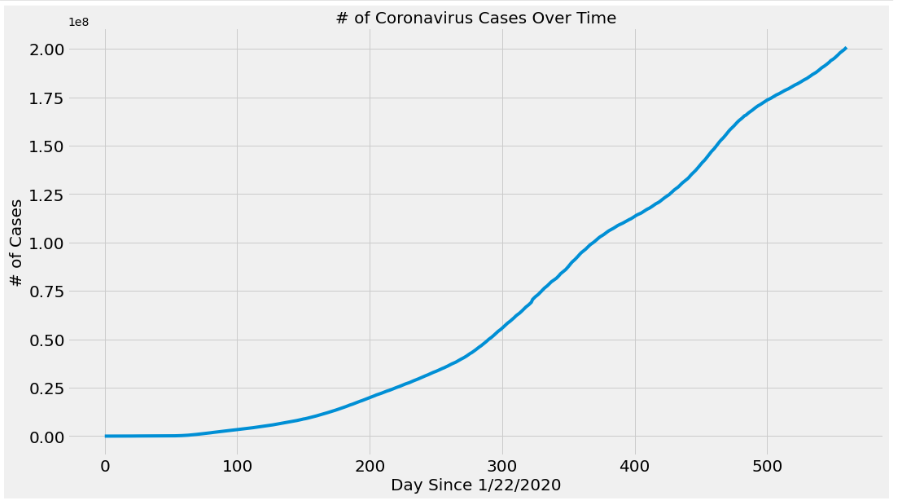 
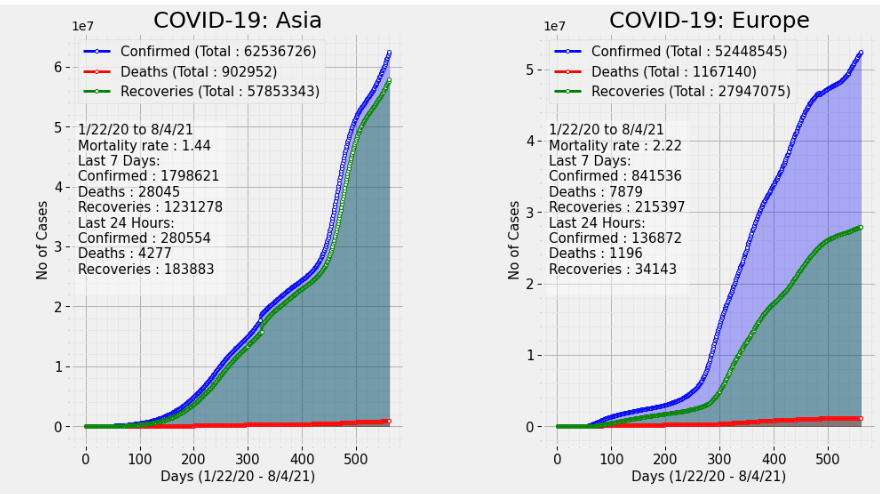


# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


In [315]:
#Nhập mã lập trình của bạn tại đây:
continents_df_19 = country_df.copy().groupby('continent', axis = 0).sum()
continents_df_19['Active'] = continents_df_19['Confirmed'] - continents_df_19['Deaths'] - continents_df_19['Recoveries']
continents_df_19['Mortality Rate'] = round(continents_df_19['Deaths'] / continents_df_19['Confirmed'] * 100,2)
continents_df_19['Active Rate'] = round(continents_df_19['Active'] / continents_df_19['Confirmed'] * 100,2)
continents_df_19['Recoveries Rate'] = round(continents_df_19['Recoveries'] / continents_df_19['Confirmed'] * 100,2)

continents_df_19.head(10)

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Active Rate,Recoveries Rate
continent,,,,,,,
Africa,6810421,172864,5916462,721095,2.54,10.59,86.87
Asia,62256172,898675,57669460,3688037,1.44,5.92,92.63
Australia,88510,1409,54055,33046,1.59,37.34,61.07
Europe,52311673,1165944,27912932,23232797,2.23,44.41,53.36
North America,42207215,923040,5748546,35535629,2.19,84.19,13.62
Others,749083,16292,649566,83225,2.17,11.11,86.71
South America,35655056,1094300,32630980,1929776,3.07,5.41,91.52


In [370]:
contitnent1 = continents_df_19['Mortality Rate'] == continents_df_19['Mortality Rate'].max()
continents_df_19[contitnent1]

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Active Rate,Recoveries Rate
continent,,,,,,,
South America,35655056,1094300,32630980,1929776,3.07,5.41,91.52


In [371]:
contitnent2 = continents_df_19['Active Rate'] == continents_df_19['Active Rate'].max()
continents_df_19[contitnent2]

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Active Rate,Recoveries Rate
continent,,,,,,,
North America,42207215,923040,5748546,35535629,2.19,84.19,13.62


In [372]:
contitnent3 = continents_df_19['Recoveries Rate'] == continents_df_19['Recoveries Rate'].max()
continents_df_19[contitnent3]

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Active Rate,Recoveries Rate
continent,,,,,,,
Asia,62256172,898675,57669460,3688037,1.44,5.92,92.63


Trả lời: 
19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?
        South Ameriaca với tỷ lệ 3.07% 

19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
        North America lệ 84.19% 

19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?
        Asia với tỷ lệ 92.63% ca khỏi bệnh


# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [320]:
#Bước 1: Ta lại dataframe đã có từ bài toán trước (có sẵn tỷ lệ Mortality Rate)
country_df_20 = country_df.copy().reset_index()
country_df_20

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
0,Afghanistan,Asia,148572,6804,82586,59182,4.58
1,Albania,Europe,133211,2457,130291,463,1.84
2,Algeria,Africa,175229,4370,117557,53302,2.49
3,Andorra,Europe,14766,128,14348,290,0.87
4,Angola,Africa,43070,1022,39389,2659,2.37
...,...,...,...,...,...,...,...
196,West Bank and Gaza,Others,317264,3609,312289,1366,1.14
197,Winter Olympics 2022,Others,0,0,0,0,NaN
198,Yemen,Asia,7086,1380,4232,1474,19.48
199,Zambia,Africa,197123,3422,189341,4360,1.74


In [331]:
#Bước 2 : Thêm vào 2 cột Recovery_rate và Mortality Rate
country_df_20['Recovery_rate'] = round(country_df_20['Recoveries'] / country_df_20['Confirmed'] * 100,2)
country_df_20['Spread Rate'] = round(country_df_20['Active'] / country_df_20['Confirmed'] * 100,2)
country_df_20

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate,Spread Rate
0,Afghanistan,Asia,148572,6804,82586,59182,4.58,55.59,39.83
1,Albania,Europe,133211,2457,130291,463,1.84,97.81,0.35
2,Algeria,Africa,175229,4370,117557,53302,2.49,67.09,30.42
3,Andorra,Europe,14766,128,14348,290,0.87,97.17,1.96
4,Angola,Africa,43070,1022,39389,2659,2.37,91.45,6.17
...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,Others,317264,3609,312289,1366,1.14,98.43,0.43
197,Winter Olympics 2022,Others,0,0,0,0,NaN,NaN,NaN
198,Yemen,Asia,7086,1380,4232,1474,19.48,59.72,20.80
199,Zambia,Africa,197123,3422,189341,4360,1.74,96.05,2.21


In [364]:
# Bước 3: Sắp xếp theo từng cột và trả lời câu hỏi
#20.1 Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia? --> Vanuatu 
country_df_20.sort_values('Mortality Rate', ascending = False).head(1)


,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate,Spread Rate
193,Vanuatu,Australia,4,1,3,0,25.0,75.0,0.0


In [365]:
#20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia? --> Kiribati
country_df_20.sort_values('Spread Rate', ascending = False).head(1)

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate,Spread Rate
91,Kiribati,Australia,2,0,0,2,0.0,0.0,100.0


In [368]:
#20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
country_df_20.sort_values('Recovery_rate', ascending = False).head(1)


,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Recovery_rate,Spread Rate
151,Samoa,Australia,3,0,3,0,0.0,100.0,0.0


# Bài toán 21
**Tập dữ liệu USA**

In [333]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang? 
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [339]:
#Nhập mã lập trình của bạn tại đây:
#Bước 1: Nghiên cứ dataset: 58 rowx x 21 colummn vơi nhiều trường N/A trong đó 
us_medical_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,1.691666e+04,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1.250876e+03,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8.488323e+03,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,1.143109e+04,6.494042,2020-07-06,344968.0,1.203975
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,284348,6369,NaN,NaN,6,...,NaN,NaN,NaN,84000006.0,USA,1.213132e+04,NaN,2020-07-06,4793353.0,2.233000
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,39062,1752,4603.0,27963.0,8,...,NaN,5565.0,NaN,84000008.0,USA,6.175921e+03,16.252921,2020-07-06,355655.0,4.936217
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,...,NaN,10411.0,NaN,84000009.0,USA,1.470748e+04,22.162381,2020-07-06,524364.0,9.234503
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,572,6778.0,4943.0,10,...,177990.0,NaN,NaN,84000010.0,USA,1.827856e-06,NaN,2020-07-06,127179.0,4.653055
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,...,NaN,NaN,NaN,84088888.0,USA,NaN,NaN,2020-07-06,NaN,0.000000


In [340]:
us_medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             48 non-null     float64
 8   Active                48 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  Total_Test_Results    10 non-null     float64
 12  People_Hospitalized   36 non-null     float64
 13  Case_Fatality_Ratio   0 non-null      float64
 14  UID                   58 non-null     float64
 15  ISO3                  58 

In [341]:
#Bước 2: Xử lý những trường N/A - đặc biệt  
#Incident_Rate         56 non-null     float64 
#Mortality_Rate        57 non-null     float64
#Recovered             48 non-null     float64
us_medical_data.fillna(0, inplace=True)
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,0.0,2914.0,0.0,84000001.0,USA,0.000000,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,0.0,0.0,0.0,84000002.0,USA,16916.662680,0.000000,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,0.0,0.0,60,...,0.0,0.0,0.0,16.0,ASM,1250.876152,0.000000,2020-07-06,696.0,0.000000
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,0.0,5188.0,0.0,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,0.0,1575.0,0.0,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


In [348]:
# Bước 3: Trả lời câu hỏi 
# 21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang? --> Connecticut
mask1 = us_medical_data['Mortality_Rate'] == us_medical_data['Mortality_Rate'].max()
us_medical_data[mask1]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,...,0.0,10411.0,0.0,84000009.0,USA,14707.483577,22.162381,2020-07-06,524364.0,9.234503


In [351]:
#21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?  --> New York
mask2 = us_medical_data['Incident_Rate'] == us_medical_data['Incident_Rate'].max()
us_medical_data[mask2]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,...,4288131.0,89995.0,0.0,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632


In [358]:
#21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang? --> Minnesota
us_medical_data['Recoveries_Rate'] = us_medical_data['Recovered'] / us_medical_data['Confirmed'] * 100
us_medical_data['Recoveries_Rate'].max()
mask3 = us_medical_data['Recoveries_Rate'] == us_medical_data['Recoveries_Rate'].max()
us_medical_data[mask3]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Recoveries_Rate
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27,...,4219.0,0.0,84000027.0,USA,12052.080703,10.938837,2020-07-06,679693.0,3.917654,87.912572


# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp được xác nhận mới trong 10 bang hàng đầu có số ca xác nhận dương tính cao nhất ở Hoa Kỳ.

In [361]:
#Nhập mã lập trình của bạn tại đây:
us_top10cf = us_medical_data.sort_values('Confirmed', ascending = False).head(10)
us_top10cf = us_top10cf[['Confirmed', 'People_Tested']]
us_top10cf

,Confirmed,People_Tested
36,397649,4288131.0
5,284348,4793353.0
11,206447,3559399.0
49,204710,2163729.0
34,174766,1549209.0
17,147865,1783962.0
25,110137,899417.0
3,101455,873294.0
12,97064,958953.0
43,94439,1018320.0


Text(0.5, 1.0, 'Relationship between people tested and number of confirmed cases')

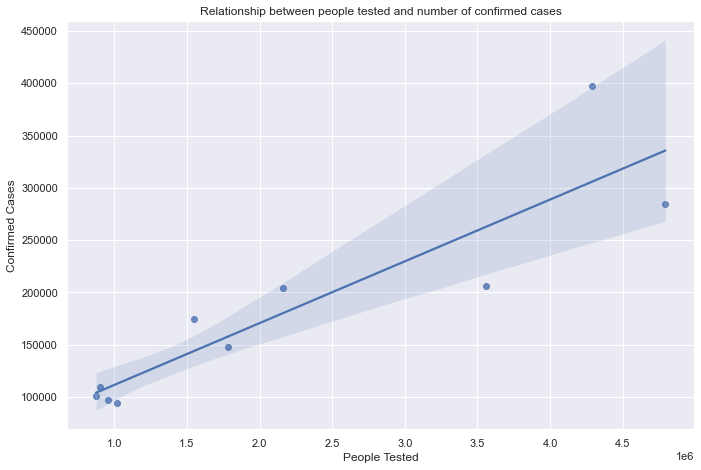

In [363]:
# Regression giữa số người được test và số ca mắc Covid 
ax = sns.regplot(x = 'People_Tested', y = 'Confirmed', data = us_top10cf)
ax.set(xlabel = 'People Tested', ylabel = 'Confirmed Cases')
ax.set_title('Relationship between people tested and number of confirmed cases')